# Assignment 2: Segmentation Exercise 
### Name: Armaan Dhanda 906310394


In [103]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
import seaborn as sns
from tabulate import tabulate
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [104]:
import pandas as pd
 
data = pd.read_excel('mugs-data-for-segmentation-exercise.xlsx')
 


### Part A: Product affinity based segmentation

**Question 1: Product C**

In [105]:
product3_weighted_avg = (data.iloc[:, 1:30].multiply(data['P3'], axis=0).sum()) / (data['P3'].sum())
print("Weighted Average for Product C")
product3_weighted_avg


Weighted Average for Product C


 pPr30       1.000000
 pPr10       5.015490
 pPr05       7.000000
pIn0.5       1.000000
pIn1         3.914327
pIn3         7.000000
 pCp12       3.096495
 pCp20       5.327830
 pCp32       3.879569
 pClD        1.000000
 pClF        4.870364
 pClE        7.000000
pCnSl        1.000000
pCnSp        3.780847
pCnLk        7.000000
 pBrA        3.891631
 pBrB        3.608785
 pBrC        4.463553
 IPr        25.957759
Iin         11.139006
 ICp        12.199318
 ICl        21.128709
Icn         16.648585
 IBr        12.966526
income      57.743197
age         46.473295
sports       0.448284
gradschl     0.448373
P1           0.349275
dtype: float64

**Question 2: Product A & B**

In [106]:
# Compute weighted averages for Product from Brand A
productA_weighted_avg =(data.iloc[:, 1:30].multiply(data['P1'], axis=0).sum()) / (data['P1'].sum())

# Compute weighted averages for Product from Brand B
productB_weighted_avg = (data.iloc[:, 1:30].multiply(data['P2'], axis=0).sum()) / (data['P2'].sum())
print("Weighted Average for Product A \n")
print(productA_weighted_avg)
print("\n Weighted Average for Product B \n")
print(productB_weighted_avg)

Weighted Average for Product A 

 pPr30       1.000000
 pPr10       4.919876
 pPr05       7.000000
pIn0.5       1.000000
pIn1         4.020961
pIn3         7.000000
 pCp12       3.266504
 pCp20       5.366698
 pCp32       3.789076
 pClD        1.000000
 pClF        4.868985
 pClE        7.000000
pCnSl        1.000000
pCnSp        3.850350
pCnLk        7.000000
 pBrA        5.429532
 pBrB        3.500791
 pBrC        3.040357
 IPr        18.047792
Iin         13.356015
 ICp        16.360400
 ICl        18.474953
Icn         20.656958
 IBr        13.116932
income      60.166276
age         46.711154
sports       0.470745
gradschl     0.359619
P1           0.486025
dtype: float64

 Weighted Average for Product B 

 pPr30       1.000000
 pPr10       5.666979
 pPr05       7.000000
pIn0.5       1.000000
pIn1         4.133281
pIn3         7.000000
 pCp12       3.108512
 pCp20       5.337524
 pCp32       3.970306
 pClD        1.000000
 pClF        5.037719
 pClE        7.000000
pCnSl        1.

In [107]:


def calculate_weighted_averages_v2(data, product_column_names):
    """
    Calculate weighted averages for each product based on the purchase probability for each product.

    :param data: DataFrame containing the data.
    :param product_column_names: List of column names for the product purchase probabilities.
    :return: DataFrame with weighted averages for each product.
    """
    weighted_averages_df = pd.DataFrame(columns=product_column_names)
    
    for product_col in product_column_names:
        weighted_avg = (data.iloc[:, 1:30].multiply(data[product_col], axis=0).sum()) / data[product_col].sum()
        weighted_averages_df[product_col] = weighted_avg
    
    return weighted_averages_df

def calculate_log_lifts(data, product_column_names, overall_means):
    """
    Calculate log lifts for each product based on the purchase probability for each product and the overall mean.
    
    :param data: DataFrame containing the data.
    :param product_column_names: List of column names for the product purchase probabilities.
    :param overall_means: Series containing the overall mean for each descriptor.
    :return: DataFrame with log lifts for each product.
    """
    # Initialize a DataFrame to store the log lifts for each product
    log_lifts_df = pd.DataFrame(columns=data.columns[1:-3])  # exclude 'Cust' and product probability columns

    # Calculate weighted averages for each product
    weighted_averages_df = calculate_weighted_averages_v2(data, product_column_names)

    # Calculate log lifts for each product
    for product_col in product_column_names:
        log_lifts = np.log10(weighted_averages_df.loc[:, product_col] / overall_means)
        log_lifts_df.loc[product_col] = log_lifts

    # Filter the log lifts based on the thumb rule
    noteworthy_log_lifts_df = log_lifts_df[(log_lifts_df.abs() > 0.04) & (log_lifts_df.abs() < 0.08)]
    very_noteworthy_log_lifts_df = log_lifts_df[log_lifts_df.abs() >= 0.08]

    return log_lifts_df, noteworthy_log_lifts_df, very_noteworthy_log_lifts_df

# Sample data


# Calculate the overall means for each descriptor
overall_means_for_log_lifts = data.iloc[:, 1:-3].mean()

# Call the function to calculate log lifts for products of brand A and B
log_lifts, noteworthy_log_lifts, very_noteworthy_log_lifts = calculate_log_lifts(
    data, ['P1', 'P2','P3'], overall_means_for_log_lifts
)

print("Log Lifts for all products:")
print("Product C: \n")
print(log_lifts.loc['P3'])
print("\n Product A: \n")
print(log_lifts.loc['P1'])
print("\n Product B: \n")
print(log_lifts.loc['P2'])



Log Lifts for all products:
Product C: 

 pPr30      0.000000e+00
 pPr10     -2.124012e-02
 pPr05      9.643275e-17
pIn0.5      0.000000e+00
pIn1       -1.391779e-02
pIn3        9.643275e-17
 pCp12     -8.038233e-03
 pCp20     -1.320238e-03
 pCp32     -1.241495e-03
 pClD       0.000000e+00
 pClF      -6.352078e-03
 pClE       9.643275e-17
pCnSl       0.000000e+00
pCnSp      -1.920242e-02
pCnLk       9.643275e-17
 pBrA      -5.244041e-03
 pBrB      -4.539661e-02
 pBrC       4.796992e-02
 IPr       -5.000474e-02
Iin         9.919884e-03
 ICp       -4.311809e-02
 ICl        8.243381e-02
Icn         1.568919e-02
 IBr       -4.747315e-04
income      2.116353e-02
age         1.414614e-02
sports      1.272804e-01
gradschl    1.273664e-01
Name: P3, dtype: float64

 Product A: 

 pPr30      0.000000e+00
 pPr10     -2.959933e-02
 pPr05      9.643275e-17
pIn0.5      0.000000e+00
pIn1       -2.245014e-03
pIn3        9.643275e-17
 pCp12      1.517452e-02
 pCp20      1.836530e-03
 pCp32     -1.14916

Persona for Product A: Mid-Level Professionals <br>
Customers that choose (or are targeted for) Product A are typically mid-level professionals who are drawn to quality and brand recognition over product price. They have higher incomes (60.1663) and have a preference for brands. This segment also shows a slight interest in sports, indicating an active lifestyle.

sample person:<br>
Ashutosh, a 40-year-old investment banker from New York. She is willing to pay an extra price to buy products of well-known brands which provide are great in quality. Her choice of a coffee mug is from Brand A. Fitness is her passion, and she regularly visits a premium gym. Amy prefers products that signify status and success, aligning with her professional and societal identity.

Persona for Product B: Early-Level Professionals/Students <br>
Customers that choose (or are targeted for) Product B are younger, possibly early-career individuals who are price-sensitive and value practicality.

sample person:<br>
Armaan, a 25-year-old data scientist who recently started her career and lives in a social, affordable, urban area (like LA). She is focused on building her savings (for yearly trips) and will always be on the lookout for the best deals (price discounts) that won’t compromise on quality.

Persona for Product C: Family-Person <br>
Product C's customers are likely middle-aged, with a balanced view of income and lifestyle, indicated by a moderate income level and interest in lifestyle products. This segment may not be as brand loyal but values specific product features or sustainability, which Product C offers.

sample person:<br>
Raj, a 40-year-old technology consultant, represents Product C's ideal customer. Living in a suburban area with her family and working remotely, she is very conscious of the environmental impact of her purchases and chooses products that are eco-friendly and sustainably sourced. Emily wants to support responsible brands, making thoughtful choices that reflect her values and what is best for her family.

In [108]:
### Part B: Classical Segmentation

In [109]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [110]:

# Extract the data for k-means analysis
X = data.iloc[:, 1:-7]
X

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1,5,8,32,7,34,14
1,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1,6,3,17,10,51,15
2,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7,55,5,5,8,16,9
3,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5,12,9,3,40,20,16
4,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7,56,6,19,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,3,7,1,6,7,1,7,6,1,7,7,1,5,7,4,1,7,54,13,6,10,7,10
307,1,3,7,1,6,7,1,7,6,1,6,7,1,2,7,7,1,4,8,24,4,39,15,11
308,1,6,7,1,5,7,1,7,3,1,2,7,1,3,7,7,3,1,12,34,16,14,13,11
309,1,3,7,1,5,7,1,7,1,1,4,7,1,4,7,1,5,7,57,5,5,17,5,10


In [111]:
# Define the range of k values to try
k_values = range(2, 11)


# Initialize lists to store average within-cluster sum of squares
average_within_cluster_sums_of_squares = []

In [112]:
for k in k_values:
    # Initialize k-means model
    kmeans_model = KMeans(n_clusters=k, n_init=50, max_iter=100, random_state=410014)
    
    # Fit the model to the data
    kmeans_model.fit(X)
    
    # Calculate the average within-cluster sum of squares
    average_within_cluster_sums_of_squares.append(kmeans_model.inertia_ / X.shape[0])

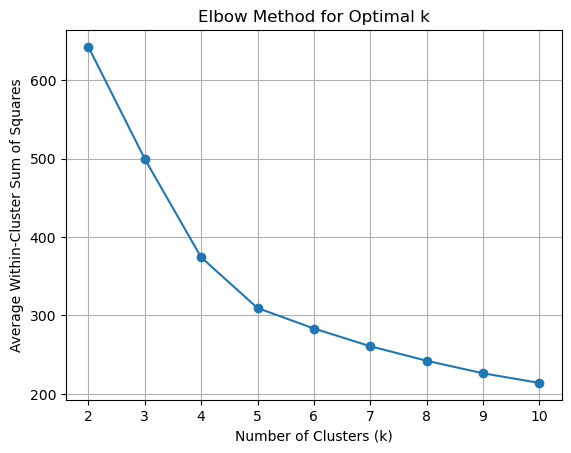

In [113]:
# Plot the elbow curve
plt.plot(k_values, average_within_cluster_sums_of_squares, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [114]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Function to compute log-lifts for all variables for all segments
def calculate_log_lifts(data, clusters):
    overall_mean = data.mean()
    log_lifts = {}
    for col in data.columns:
        unweighted_avg_within_segment = data.groupby(clusters)[col].mean()
        log_lifts[col] = np.log10(unweighted_avg_within_segment / overall_mean[col])
    return log_lifts

# Perform k-means clustering with k=6
kmeans = KMeans(n_clusters=5, n_init=50, max_iter=100, random_state=410014)
clusters = kmeans.fit_predict(X)  # Exclude demographic columns and product probabilities

# Compute average value of each variable for each segment
segment_means = data.groupby(clusters).mean()

# Compute profiling in terms of demographics
demographics_means = data.groupby(clusters)[['income', 'age', 'sports', 'gradschl']].mean()

# Compute percentage of customers in each segment
segment_sizes = data.groupby(clusters).size() / len(data) * 100

# Compute log-lifts for all variables for all segments
log_lifts = calculate_log_lifts(data.iloc[:, :-4], clusters)

# Convert log_lifts dictionary to DataFrame
log_lifts_df = pd.DataFrame(log_lifts).reset_index()



# Print demographics means
print("\nDemographics Means:")
print(tabulate(demographics_means_data, headers='keys', tablefmt='pretty'))

# Print segment sizes
print("\nSegment Sizes (%):")
print(tabulate(segment_sizes_data, headers='keys', tablefmt='pretty'))






Demographics Means:
+---+---------+--------------------+--------------------+---------------------+---------------------+
|   | Segment |       income       |        age         |       sports        |      gradschl       |
+---+---------+--------------------+--------------------+---------------------+---------------------+
| 0 |   0.0   | 47.401408450704224 | 42.225352112676056 | 0.1056338028169014  | 0.2887323943661972  |
| 1 |   1.0   | 58.75757575757576  | 45.21212121212121  | 0.6666666666666666  | 0.36363636363636365 |
| 2 |   2.0   |        59.1        |       44.825       |        0.275        |        0.025        |
| 3 |   3.0   | 62.38095238095238  | 46.857142857142854 | 0.35714285714285715 | 0.2857142857142857  |
| 4 |   4.0   | 63.888888888888886 | 50.75925925925926  | 0.7592592592592593  | 0.7037037037037037  |
+---+---------+--------------------+--------------------+---------------------+---------------------+

Segment Sizes (%):
+---+---------+--------------------+
|   

In [115]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Print segment means
print("Segment Means:")
segment_means_data





Segment Means:


,Segment,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl,P1,P2,P3
0,0,160.338028,1.0,5.556338,7.0,1.0,4.049296,7.0,2.852113,5.169014,4.225352,1.0,4.859155,7.0,1.0,3.915493,7.0,2.640845,4.119718,5.176056,46.429577,7.964789,8.781690,12.591549,11.345070,12.887324,47.401408,42.225352,0.105634,0.288732,0.117733,0.688030,0.194236
1,1,165.878788,1.0,4.727273,7.0,1.0,4.606061,7.0,3.363636,4.787879,3.939394,1.0,4.515152,7.0,1.0,3.484848,7.0,4.939394,4.181818,2.636364,16.030303,29.575758,12.303030,14.363636,14.606061,12.969697,58.757576,45.212121,0.666667,0.363636,0.502428,0.197450,0.300122
2,2,130.550000,1.0,4.900000,7.0,1.0,4.075000,7.0,4.375000,6.000000,2.825000,1.0,5.150000,7.0,1.0,4.100000,7.0,5.800000,3.775000,2.375000,13.650000,9.450000,41.975000,10.975000,11.000000,12.850000,59.100000,44.825000,0.275000,0.025000,0.462338,0.309967,0.227696
3,3,134.880952,1.0,5.190476,7.0,1.0,3.976190,7.0,2.761905,5.428571,4.285714,1.0,4.952381,7.0,1.0,4.547619,7.0,6.000000,3.571429,2.547619,12.880952,8.571429,9.714286,12.238095,43.166667,13.571429,62.380952,46.857143,0.357143,0.285714,0.563665,0.151370,0.284965
4,4,173.833333,1.0,5.166667,7.0,1.0,3.703704,7.0,3.222222,5.592593,3.462963,1.0,5.259259,7.0,1.0,3.759259,7.0,3.759259,4.111111,4.055556,15.722222,10.018519,8.333333,41.111111,12.000000,12.870370,63.888889,50.759259,0.759259,0.703704,0.386500,0.206891,0.406609


In [116]:
# Print log-lifts
print("\nLog-Lifts:")
log_lifts_df



Log-Lifts:


,index,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports
0,0,0.011912,0.0,0.023235,0.0,0.0,0.000805,0.0,-0.043742,-0.014463,0.035838,0.0,-0.007353,0.0,0.0,-0.004005,0.0,-0.173633,0.012110,0.112288,0.202523,-0.135752,-0.185876,-0.142360,-0.150881,-0.003136,-0.064546,-0.027484,-0.500470
1,1,0.026666,0.0,-0.046943,0.0,0.0,0.056755,0.0,0.027900,-0.047727,0.005404,0.0,-0.039241,0.0,0.0,-0.054608,0.0,0.098298,0.018607,-0.180705,-0.259330,0.434009,-0.039442,-0.085175,-0.041155,-0.000369,0.028727,0.002198,0.299636
2,2,-0.077348,0.0,-0.031357,0.0,0.0,0.003553,0.0,0.142069,0.050281,-0.139007,0.0,0.017894,0.0,0.0,0.015992,0.0,0.168052,-0.025841,-0.226047,-0.329139,-0.061495,0.493537,-0.202035,-0.164295,-0.004395,0.031250,-0.001537,-0.084940
3,3,-0.063174,0.0,-0.006346,0.0,0.0,-0.007108,0.0,-0.057700,0.006815,0.041998,0.0,0.000901,0.0,0.0,0.060993,0.0,0.182776,-0.049916,-0.195576,-0.354324,-0.103873,-0.142043,-0.154725,0.429460,0.019327,0.054715,0.017718,0.028569
4,4,0.047008,0.0,-0.008343,0.0,0.0,-0.037939,0.0,0.009247,0.019743,-0.050577,0.0,0.027011,0.0,0.0,-0.021689,0.0,-0.020273,0.011202,0.006340,-0.267758,-0.036123,-0.208635,0.371520,-0.126507,-0.003707,0.065088,0.052458,0.356117


Segment 0:

Lower Importance in Attributes: This segment demonstrates a notably lower preference for several product attributes, such as ICp (capacity), ICl (cleanability), and Icn (containment). This suggests they may prioritize other factors over specific product features.
Lower Sports Activity: Members of this segment are significantly less likely to be sports active, indicating potentially different lifestyle preferences or interests.
Income and Age: Slightly below the overall average, suggesting a demographic that may be more price-sensitive or younger.
Segment 1:

Higher Importance of Price and Cleanability: This segment exhibits a greater sensitivity to price, as indicated by the high log-lift in IPr (price importance). They also place significant importance on cleanability, reflecting a preference for easy-to-maintain products.
Sports and Graduate School: More likely to be sports active and have a graduate degree, suggesting a potentially more affluent and health-conscious demographic.
Segment 2:

High Importance of Containment (Icn): Members of this segment prioritize containment features, indicating a need for reliable or secure products that prevent leaks or spills.
Moderately Higher Income and Age: Reflects a demographic that may be more established or family-oriented.
Segment 3:

Exceptional Importance of Capacity (ICp): This segment highly values larger capacities, suggesting a preference for products that can hold more liquid or offer extended usage without refilling.
Lower Graduate School Rate: Members of this segment have significantly lower levels of graduate education, potentially indicating different lifestyle or professional priorities.
Segment 4:

High Importance of Cleanability (ICl): This segment shows a strong preference for products that are easy to clean and maintain, possibly due to a busy lifestyle or higher standards for convenience.
Higher Sports Activity and Graduate School: Members of this segment are the most educationally advanced and physically active, suggesting a demographic that values both health and education highly.

#### Optional

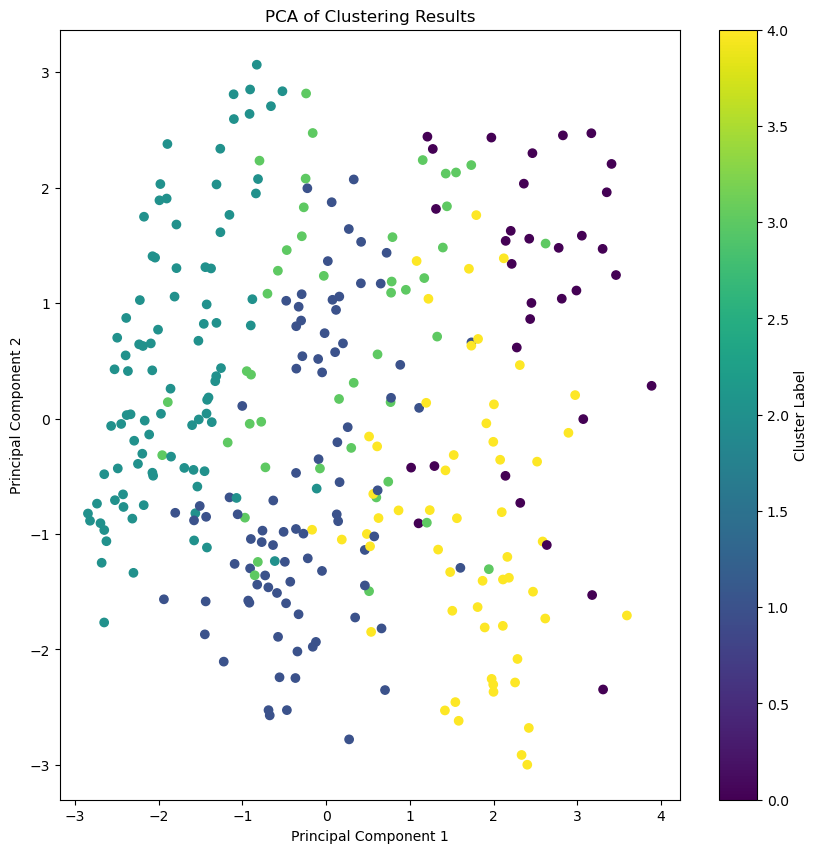

In [117]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = data.iloc[:, 1:-7]

# Standardize the X matrix to make PCA operate on correlations instead of covariances
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeansModel = KMeans(n_clusters=5, n_init=50, max_iter=100)
kmeansModel.fit(X_std)
labels = kmeansModel.labels_

# Perform PCA with 2 components
pca_2 = PCA(n_components=2)
plot_columns = pca_2.fit_transform(X_std)

# Visualize the first two principal components
plt.figure(figsize=(10, 10))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels, cmap='viridis', alpha=1)
plt.title('PCA of Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()




In [118]:

loadings = pd.DataFrame(pca_2.components_.T, columns=['PC1', 'PC2'])
print(loadings)


             PC1           PC2
0  -0.000000e+00 -0.000000e+00
1  -1.359819e-01  6.012471e-02
2  -2.220446e-16 -1.387779e-17
3  -0.000000e+00 -1.110223e-16
4   4.254309e-02 -8.472446e-02
5  -0.000000e+00 -5.551115e-17
6   1.517645e-01  5.361260e-01
7   5.914016e-02  7.366718e-02
8  -1.515568e-01 -5.572492e-01
9  -0.000000e+00 -8.673617e-19
10 -3.441855e-03  1.847182e-01
11  1.058791e-22 -0.000000e+00
12 -0.000000e+00  2.710505e-20
13  6.809910e-02  2.509422e-01
14 -4.135903e-25 -0.000000e+00
15  4.861976e-01 -1.913776e-02
16 -4.512232e-02 -2.392235e-01
17 -4.465584e-01  2.368748e-01
18 -5.072769e-01  4.120221e-02
19  2.461246e-01 -1.726138e-01
20  3.368647e-01  1.868983e-01
21 -5.792772e-02  1.521020e-01
22  2.283312e-01 -2.492224e-01
23  2.891147e-02 -1.528220e-01


PC1 heavily reflects the influence of price importance (IPr) and the preference for Brand A (pBrA), with a significant negative loading for IPr and a strong positive loading for pBrA.
PC2 shows a strong positive loading for capacity preference at pCp12 and a strong negative loading for pCp32, indicating a dimension representing the trade-off between preferring smaller or larger capacities.
Recommendations for Brand C:
Segment with Preference for Larger Capacities (pCp32):

Product Offering: Recognizing a significant cluster with a strong negative loading on PC2 for pCp32, Brand C could introduce a larger capacity mug with competitive pricing, emphasizing essential features to appeal to this segment.
Price-Sensitive Segment (IPr):

Product Offering: Given the significant negative loading on PC1 for IPr, Brand C should consider offering a value product meeting basic needs without unnecessary features, appealing to the highly price-sensitive segment.
Brand-Conscious Segments (pBrA, pBrB, pBrC):

Product Offering: The loadings indicate distinct brand preferences, with some segments strongly inclined towards Brand A (pBrA) and others against Brand C (pBrC). Brand C needs to strengthen its brand equity through marketing, focusing on unique selling propositions that differentiate it from competitors.
Strategy Development using the "Three Cs":
Company (Capabilities and Goals):

Brand C should assess internal capabilities, including resources, technology, and expertise, to determine which segment it can serve most effectively.
Leveraging innovation and design strengths can be crucial if Brand C aims to differentiate itself.
Customers (Needs and Preferences):

Evaluate the needs and desires of each segment, prioritizing product attributes that are important to them.
Focus on segments demonstrating growth potential, underserved needs, or higher profitability.
Competitors (Market Position and Offerings):

Analyze the competitive landscape, considering competitors' pricing, brand strength, and product offerings.
Identify market gaps that Brand C can exploit and position itself effectively.